In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#!pip install pyramid.arima
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import random
from IPython.display import HTML
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib.colors as mc
import colorsys
from random import randint
import re
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm # For Windows
import matplotlib as mpl
import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
from scipy import stats
import plotly.figure_factory as ff
from IPython.core.interactiveshell import InteractiveShell
from plotly.offline import iplot
#import chart_studio.plotly as py
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl', offline=True)


import datetime
from dateutil.relativedelta import relativedelta

#import statsmodels
#import statsmodels.api as sm  
#from statsmodels.tsa.stattools import acf  
#from statsmodels.tsa.stattools import pacf
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
#from pyramid.arima import auto_arima
#print(plt.rcParams['font.family'])
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
cf.go_offline(connected=True)

import plotly.io as pio
pio.renderers.default = 'notebook_connected'

#import os
#file = []
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
    
        #file.append(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

# Data Info

## 환자데이터
- PatientInfo : 한국 코로나 바이러스 환자의 역학 데이터
- PatientRoute : 한국 코로나 바이러스 환자의 경로 데이터

## 시계열 데이터
- Time : 대한민국 코로나 바이러스 상태의 시계열 데이터
- TimeProvince : 대한민국 내 코로나 바이러스 상태의 시계열 데이터
- TimeAge : 대한민국 연령별 코로나 바이러스 상태의 시계열 데이터
- TimeGender : 대한민국 성별로 코로나 바이러스 상태의 시계열 데이터

## 추가 데이터
- Region : 한국 지역의 위치 및 통계 데이터
- Weather : 대한민국 지역의 날씨 데이터
- SearchTrend : 한국에서 가장 큰 포털 중 하나인 네이버에서 검색된 키워드의 트렌드 데이터

## 데이콘에서 제공하진 않지만 캐글에 있는 데이터..
- Case
- SeoulFloating

# 데이터 업로드

In [ ]:
PatientInfo = pd.read_csv('/kaggle/input/coronavirusdataset/PatientInfo.csv')
Region = pd.read_csv('/kaggle/input/coronavirusdataset/Region.csv')
SearchTrend = pd.read_csv('/kaggle/input/coronavirusdataset/SearchTrend.csv')
TimeGender = pd.read_csv('/kaggle/input/coronavirusdataset/TimeGender.csv')
Weather = pd.read_csv('/kaggle/input/coronavirusdataset/Weather.csv')
Case = pd.read_csv('/kaggle/input/coronavirusdataset/Case.csv')
Time = pd.read_csv('/kaggle/input/coronavirusdataset/Time.csv')
TimeProvince = pd.read_csv('/kaggle/input/coronavirusdataset/TimeProvince.csv')
TimeAge = pd.read_csv('/kaggle/input/coronavirusdataset/TimeAge.csv')
PatientRoute = pd.read_csv('/kaggle/input/coronavirusdataset/PatientRoute.csv')
SeoulFloating = pd.read_csv('/kaggle/input/coronavirusdataset/SeoulFloating.csv')

# 한글폰트 설정

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
nanum_font # 나눔 폰트 하나 골라서 씁시다

In [ ]:
fm._rebuild()
path = '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 집합 구조
- 색상의 의미는 비슷한 속성을 가지고 있다는 것이다.
- 행이 열 사이에 연결되면 열 값이 부분적으로 공유됨을 의미함
- 점선은 약한 관련성을 의미함

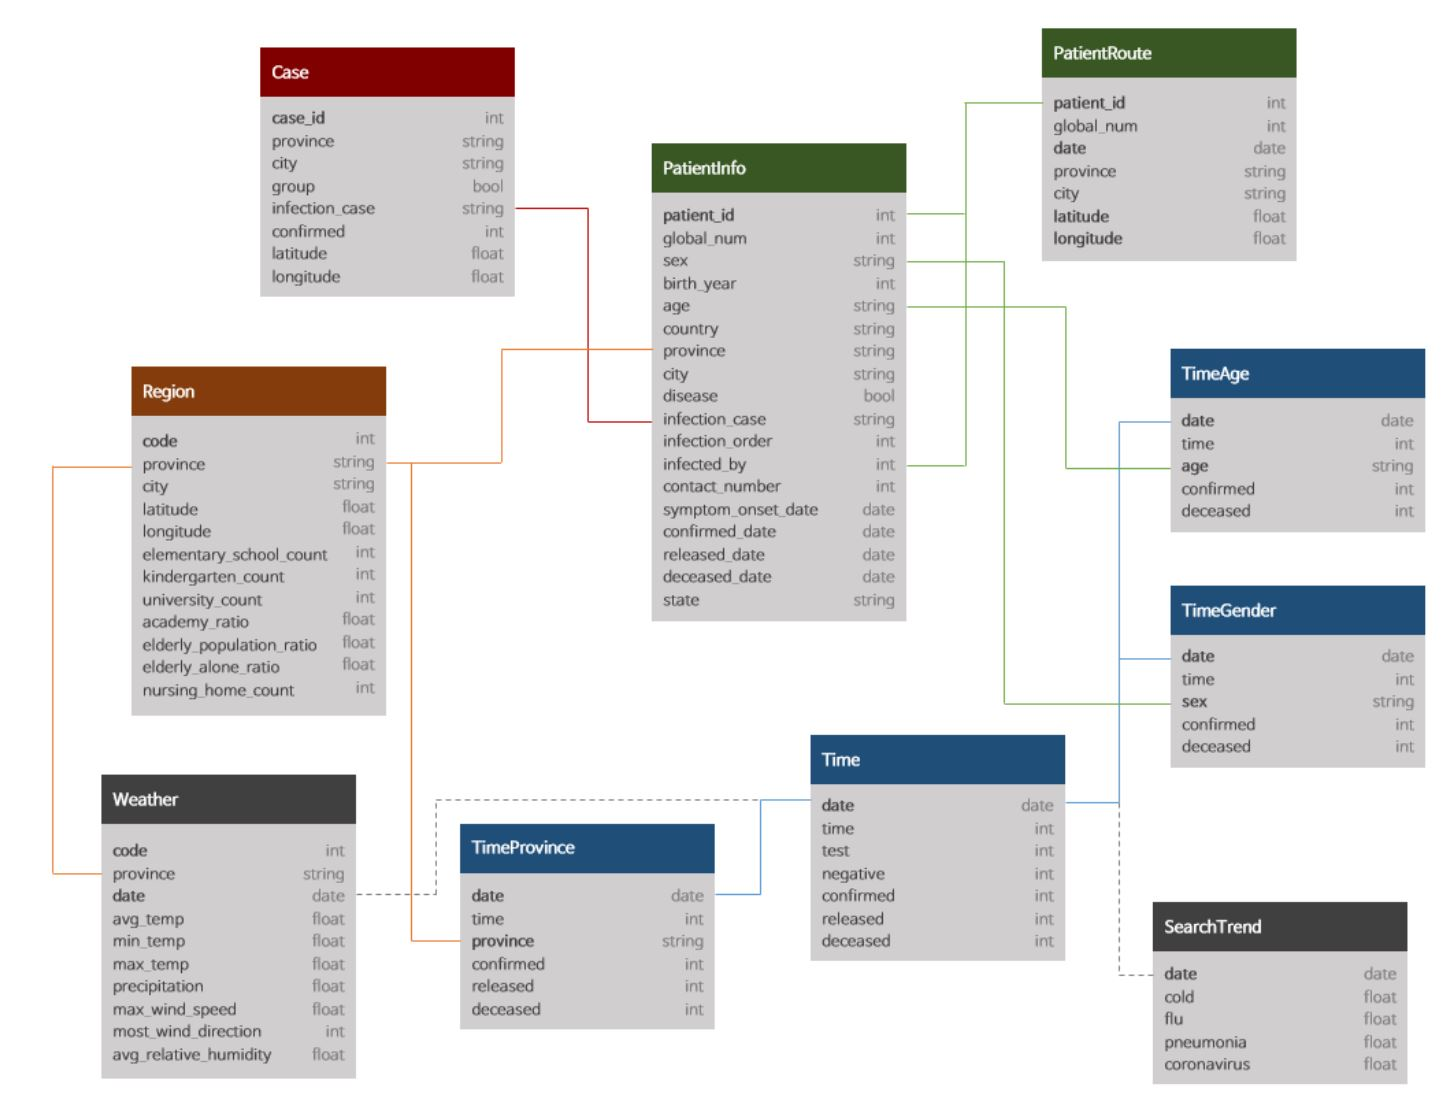

# 참고문헌
- 이유한님의 캐글 커널을 참고하였습니다 https://www.kaggle.com/youhanlee/comfirmed-bar-chart-race-depending-on-province

- 관련논문 (Spread	of	SARS-CoV-2	Coronavirus	likely	to	be	constrained	by	climate)를 참고하였습니다.

In [ ]:
province_to_kor = {'Seoul': '서울',
 'Busan' : '부산',
 'Daegu': '대구',
 'Incheon': '인천',
 'Gwangju': '광주',
 'Daejeon': '대전',
 'Ulsan': '울산',
 'Sejong': '세종',
 'Gyeonggi-do': '경기도',
 'Gangwon-do': '강원도',
 'Chungcheongbuk-do': '충청북도',
 'Chungcheongnam-do': '충청남도',
 'Jeollabuk-do': '전라북도',
 'Jeollanam-do': '전라남도',
 'Gyeongsangbuk-do': '경상북도',
 'Gyeongsangnam-do': '경상남도',
 'Jeju-do':'제주도',
'Chunghceongbuk-do': '충청북도'}

In [ ]:
PatientInfo['province_kr'] = PatientInfo['province'].map(province_to_kor)
province_list = PatientInfo['province_kr'].unique().tolist()
TimeProvince['province_kr'] = TimeProvince['province'].map(province_to_kor)

In [ ]:
def random_color_generator(number_of_colors):
    color = ['#'+''.join([random.choice('0123456789ABCDEF')])]
    return color

In [ ]:
def transform_color(color, amount = 0.5):

    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

random_hex_colors = []
for i in range(len(province_list)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))


rgb_colors = [transform_color(i, 1) for i in random_hex_colors]
rgb_colors_opacity = [rgb_colors[x] + (0.825,) for x in range(len(rgb_colors))]
rgb_colors_dark = [transform_color(i, 1.12) for i in random_hex_colors]

In [ ]:
normal_colors = dict(zip(province_list, rgb_colors_opacity))
dark_colors = dict(zip(province_list, rgb_colors_dark))

In [ ]:
Weather['date'] = pd.to_datetime(Weather['date'])
Weather['year'] = Weather['date'].dt.year
Weather['day'] = Weather['date'].dt.day
Weather['Month'] = Weather['date'].dt.month

PatientInfo['confirmed_date'] = pd.to_datetime(PatientInfo['confirmed_date'])
PatientInfo['Month'] = PatientInfo['confirmed_date'].dt.month
PatientInfo['day'] = PatientInfo['confirmed_date'].dt.day

TimeProvince['date'] = pd.to_datetime(TimeProvince['date'])

In [ ]:
color = dict(zip(province_list, random_color_generator(len(province_list))))

In [ ]:
weather_01 = Weather[['province','avg_temp','avg_relative_humidity','date','year','Month','day']]
weather_01['new_date'] =  weather_01[weather_01['year'] == 2020]['Month'].astype('str') + '/' + weather_01[weather_01['year'] == 2020]['day'].astype('str')

In [ ]:
weather_2020 = weather_01[weather_01['year']==2020]
weather_2020['province_kr'] = weather_2020['province'].map(province_to_kor)
weather_2020 = weather_2020.sort_values(['province','Month','day'])
weather_2020.reset_index(drop = True, inplace = True)

In [ ]:
fnames = SearchTrend[SearchTrend['date'] >= '2020-01-01']['date'].tolist()

In [ ]:
#fig, ax = plt.subplots(figsize = (30,15))
plt.style.use('seaborn')
element = 10
def draw_temp(current_date):
    
    df = weather_2020[weather_2020['date'].eq(current_date)].sort_values(['avg_temp'])
    df = df.reset_index(drop = True)
    
    ax.clear()
    ax.barh(df['province'], df['avg_temp'], color = [normal_colors[p] for p in df['province_kr']], edgecolor = ([dark_colors[x] for x in df['province_kr']]), linewidth = '4', )
    dx = df['avg_temp'].max() / 100
    
    for i, (value, name) in enumerate(zip(df['avg_temp'], df['province_kr'])):
        ax.text(value + dx,
               i + (element / 100), '' + name,
               size = 32,
               ha = 'left',
               va = 'center',
               fontdict = {'fontname':'NanumGothic Eco'})
        
#         ax.text(value + dx ,
#                 i - (element / 200), 
#                 f'    {value:,.0f}', 
#                 size = 32, 
#                 ha = 'left', 
#                 va = 'center')
                
        time_unit_displayed = re.sub(r'\^(.*)', r'', str(current_date))
        ax.text(1.0, 
                1.1, 
                time_unit_displayed,
                transform = ax.transAxes, 
                color = '#666666',
                size = 32,
                ha = 'right', 
                weight = 'bold', 
                fontdict = {'fontname': 'NanumGothic Eco'})
        
        ax.text(-0.005,
                1.1,
                '전국 평균 기온 2020-01-01 ~ 04-06',
                transform = ax.transAxes,
                size = 32,
                ha = 'left',
                va = 'center',
                weight = 'bold',
                fontdict = {'fontname':'NanumGothic Eco'}
               )
        
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis = 'x', colors = '#666666', labelsize = 28)
        ax.set_yticks([])
        ax.set_axisbelow(True)
        ax.margins(0, 0.01)
        ax.grid(which = 'major', axis = 'x', linestyle = '-')

        plt.locator_params(axis = 'x', nbins = 4)
        plt.box(False)
        plt.subplots_adjust(left = 0.075, right = 0.75, top = 0.825, bottom = 0.05, wspace = 0.2, hspace = 0.2)

In [ ]:
fig, ax = plt.subplots(figsize = (36, 20))
animator = animation.FuncAnimation(fig, draw_temp, frames = fnames)
HTML(animator.to_jshtml())
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

- 기온은 대체로 제주도, 부산이 가장 높은것으로 나타났고 수도권, 강원도 쪽으로 낮은 기온에 속한다고 보여짐
- 환자가 가장 많은 경상북도, 대구의 경우 수도권과 전남쪽의 기온의 사이에 많이 있는것으로 확인
- 온습도와 확진자, 사망자간의 상관관계를 알아보고 온도와 확진자수를 함께 그려보자
- 추가로 최근 유럽(이탈리아, 프랑스 등)에서 폭발적인 확진자 증가가 나타나고 있는데 향후에 외국데이터도 함께 알아보면 좋을것같다.

In [ ]:
test1 = weather_2020[weather_2020['date']>= '2020-01-20'].reset_index(drop = True)[['date','avg_temp','avg_relative_humidity']]
test2 = TimeProvince[['date','confirmed','deceased']].reset_index(drop = True)
test3 = pd.merge(test1,test2)

In [ ]:
def temp_corr_plot(city):
    tmp1 = weather_2020[weather_2020['province_kr']==city].reset_index(drop = True).iloc[19:][['date','avg_temp','avg_relative_humidity']].reset_index(drop = True)
    tmp2 = TimeProvince[TimeProvince['province_kr']==city][['date','confirmed','deceased']].reset_index(drop = True)
    tmp3 = pd.merge(tmp1, tmp2)
    
    kor_n = weather_2020[weather_2020["province_kr"]==city]["province"].unique()[0]
    plt.figure(figsize = (18,5))
    sns.heatmap(data = tmp3.corr(), annot = True, linewidths = .5 , square = True, )
    plt.title(f'Temp ~ Confirmed Correlation in {kor_n}', fontsize = 20)
    plt.show()
    
    plots = tmp3[['date','avg_temp','confirmed']].iplot(asFigure = True, x = 'date', xTitle = 'Date', subplots=True ,title = f'Average temperature by year in {city}')
    plots.show()
    
    fff = ff.create_scatterplotmatrix(tmp3[['avg_temp','avg_relative_humidity','confirmed','deceased']],
                                    height=800,width=800, diag='histogram',title = f'Scatter Plot In {city}',size = 5)
    iplot(fff)

In [ ]:
temp_corr_plot('대구')

- 시도 별로 확인해본 결과 주어진 데이터 만으로 코로나와 날씨간의 관계를 정확하게 파악하기에는 무리가 있는것 같음
- 상관관계가 낮더라도 아예 관련이 없어보이진 않는다.
- 날씨나 온도에 관련한 데이터가 더 있어야 할거같다

# 지금까지의 상황 그리고 마스크 5부제의 효과
- 현재까지 대한민국 정부의 발빠른 대처로 검사자 수 대비 확진자는 매우 적은것으로 나타남
- 공공마스크 5부제는 3월 9일부터 시행되었음
- 해당 날짜 이후부터 확진자가 줄었는지 확인해보자

In [ ]:
Time[['date','negative','confirmed','test','deceased']].plot(x = 'date',figsize = (15,8), fontsize = 10)
plt.title('Current Situation', fontsize = 32)

In [ ]:
# 일일 확진자 수를 구합니다.
time_new = pd.DataFrame(Time)
#Time.iloc[61,2]
for i in range(78,0,-1): # row 
   for ii in range(2,7): # col
        time_new.iloc[i,ii] = time_new.iloc[i,ii] - time_new.iloc[i-1,ii]
time_new            
#time.head()

In [ ]:
before_mask = time_new[time_new['date'] <= '2020-03-08']
after_mask = time_new[time_new['date'] > '2020-03-09']

In [ ]:
df0 = before_mask[['date','test','negative','confirmed','released','deceased']]
fig = go.Figure()

fig.add_trace(go.Scatter(x = df0['date'], y = df0['test'], mode = 'lines', name = 'test'))
fig.add_trace(go.Scatter(x = df0['date'], y = df0['negative'], mode = 'lines', name = 'negative'))
fig.add_trace(go.Scatter(x = df0['date'], y = df0['confirmed'], mode = 'lines', name = 'confirmed'))
fig.add_trace(go.Scatter(x = df0['date'], y = df0['released'], mode = 'lines', name = 'released'))
fig.add_trace(go.Scatter(x = df0['date'], y = df0['deceased'], mode = 'lines', name = 'deceased'))

fig.update_layout(title = 'Before Mask Supply', xaxis_title = 'Date')

In [ ]:
df = after_mask[['date','test','negative','confirmed','released','deceased']]

fig = go.Figure()

fig.add_trace(go.Scatter(x = df['date'], y = df['test'], mode = 'lines', name = 'test'))
fig.add_trace(go.Scatter(x = df['date'], y = df['negative'], mode = 'lines', name = 'negative'))
fig.add_trace(go.Scatter(x = df['date'], y = df['confirmed'], mode = 'lines', name = 'confirmed'))
fig.add_trace(go.Scatter(x = df['date'], y = df['released'], mode = 'lines', name = 'released'))
fig.add_trace(go.Scatter(x = df['date'], y = df['deceased'], mode = 'lines', name = 'deceased'))

fig.update_layout(title = 'After Mask Supply', xaxis_title = 'Date')

- 마스크 수급전과 후에 검사, 확진자 수가 확연히 준것을 확인할 수 있습니다.
- 정부의 마스크 공급으로 코로나 예방에 큰 도움이 된것으로 나타났습니다

# ARIMA

In [ ]:
Time = pd.read_csv('/kaggle/input/coronavirusdataset/Time.csv')
decomposition = seasonal_decompose(Time['confirmed'], freq=12)  
fig = plt.figure(figsize = (18,5))
decomposition.plot()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    '''
    window : Size of the moving window.
    This is the number of observations used for calculating the statistic
    '''
    #Plot rolling statistics:
    fig = plt.figure(figsize=(10, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    

In [ ]:
test_stationarity(Time.set_index('date')['confirmed'])

# differencing

In [ ]:
time_new = pd.DataFrame(Time)
#Time.iloc[61,2]
for i in range(78,0,-1): # row 
   for ii in range(2,7): # col
        time_new.iloc[i,ii] = time_new.iloc[i,ii] - time_new.iloc[i-1,ii]
time_new            
#time.head()

In [ ]:
df = Time.set_index('date')['confirmed']
df = pd.DataFrame(df)
df['first_diff'] = df['confirmed'] - df['confirmed'].shift(20)
test_stationarity(df.first_diff.dropna(inplace=False))

# acf and pacf

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.first_diff.iloc[21:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.first_diff.iloc[21:],lags=20,ax=ax2)

In [ ]:
from statsmodels.tsa.ar_model import AR
df['confirmed'] = df['confirmed'].astype('float64')
model = ARIMA(df['confirmed'], order = (1,1,0))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
model_fit.summary()

# model = ARIMA(arima_data['count'].values, order=(1, 2, 1))
# fit_model = model.fit(trend='c', full_output=True, disp=True)
# fit_model.summary()

# predict and fit resid

In [ ]:
model_fit.plot_predict()
pd.DataFrame(model_fit.resid).plot()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# QQ Plot

In [ ]:
sm.qqplot(model_fit.resid, fit = True, line = '45')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# ljungbox

In [ ]:
qvalue, pvalue = sm.stats.acorr_ljungbox(model_fit.resid, 20)
plt.stem(pvalue)
#sm.stats.acorr_ljungbox(model_fit.resid, 20)

In [ ]:
forcast = model_fit.forecast(steps = 15)
pred_y = forcast[0].tolist()
pd.DataFrame(pred_y)

# auto_arima

In [ ]:
stepwise_model = auto_arima(df['confirmed'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,
                           stepwise=True)